In [79]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

In [80]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [81]:
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string


In [82]:
import tarfile

In [83]:
# Path to your compressed archive
archive_path = '/Users/harpreetkaur/Documents/harpreet docs/DS500 - Mathematics and Statistics for Data Science/FINAL PROJECT/Topic Two/20news-19997.tar.gz'
extracted_path = '/Users/harpreetkaur/Documents/harpreet docs/DS500 - Mathematics and Statistics for Data Science/FINAL PROJECT/Topic Two/20news-19997'

# Extract it
with tarfile.open(archive_path, 'r:gz') as tar:
    tar.extractall(path=extracted_path)


In [84]:
import os

documents = []
extracted_path = '/Users/harpreetkaur/Documents/harpreet docs/DS500 - Mathematics and Statistics for Data Science/FINAL PROJECT/Topic Two/20news-19997/20_newsgroups'

for folder in os.listdir(extracted_path):
    folder_path = os.path.join(extracted_path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if os.path.isfile(file_path):  # ✅ Ensure it's a file before opening
                with open(file_path, encoding='latin1', errors='ignore') as f:
                    documents.append(f.read())


# Step 2: Preprocessing (Tokenization, Stopwords, Lemmatization)

In [85]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harpreetkaur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harpreetkaur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harpreetkaur/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [86]:
def preprocess(doc):
    tokens = word_tokenize(doc.lower())
    tokens = [t for t in tokens if t.isalpha()]  
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)


In [87]:

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')        # For tokenization
nltk.download('stopwords')    # For stopwords
nltk.download('wordnet')  

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harpreetkaur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harpreetkaur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harpreetkaur/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [88]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [89]:
def preprocess(doc):
    
    tokens = re.findall(r'\b[a-z]{2,}\b', doc.lower())
   
    tokens = [t for t in tokens if t not in stop_words]
   
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

# Step 3: TF-IDF Vectorization

In [90]:
preprocessed_docs = [preprocess(doc) for doc in documents]


In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = vectorizer.fit_transform(preprocessed_docs)

# Topic Modeling (NMF):

In [92]:
from sklearn.decomposition import NMF
num_topics = 10
nmf = NMF(n_components=num_topics, random_state=42)
W = nmf.fit_transform(X)      
H = nmf.components_          

# Print Top Words per Topic:

In [93]:
feature_names = vectorizer.get_feature_names_out()
for i, topic in enumerate(H):
    top = topic.argsort()[-10:][::-1]
    print(f"Topic {i+1}: " + ", ".join(feature_names[j] for j in top))

Topic 1: com, hp, apple, netcom, sandvik, sun, att, kent, ibm, news
Topic 2: rutgers, christian, athos, geneva, god, religion, soc, igor, hedrick, aramis
Topic 3: talk, politics, gun, misc, people, alt, state, would, right, one
Topic 4: culture, soc, turkish, armenian, soviet, muslim, politics, mideast, zuma, talk
Topic 5: uiuc, cso, cobb, illinois, urbana, news, uxa, noise, owner, alexia
Topic 6: window, comp, sys, mac, pc, hardware, ibm, misc, forsale, graphic
Topic 7: ca, game, hockey, rec, team, sport, news, player, baseball, columbia
Topic 8: sci, digex, space, nasa, gov, access, org, key, clipper, crypt
Topic 9: uk, ac, co, magnus, ohio, state, demon, uknet, mantis, pipex
Topic 10: de, sni, mchp, ap, frank, sgi, horus, objective, atheism, abortion


# Optimal Number of Topics via Coherence

In [96]:
import numpy as np
from itertools import combinations
from sklearn.decomposition import NMF, TruncatedSVD

In [97]:
B = (X > 0).astype(int)

In [98]:
df = np.array(B.sum(axis=0)).flatten()  # shape: (n_terms,)
def cooccurrence(i, j):
    # number of docs where both term i and j appear
    return int(B[:, i].multiply(B[:, j]).sum())


In [99]:
def umass_coherence(topic_indices, eps=1):
    score = 0.0
    count = 0
    for wi, wj in combinations(topic_indices, 2):
        # C_umass(wi, wj) = log( (D(wi, wj) + eps) / D(wi) )
        score += np.log((cooccurrence(wi, wj) + eps) / (df[wi] + eps))
        count += 1
    return score / count if count > 0 else 0.0


In [100]:
results = []
feature_names = vectorizer.get_feature_names_out()


In [101]:
for k in range(5, 16):
    # NMF
    nmf = NMF(n_components=k, random_state=42).fit(X)
    H_nmf = nmf.components_
    top_n = 10
    topics_nmf = [topic.argsort()[-top_n:] for topic in H_nmf]
    coh_nmf = np.mean([umass_coherence(t) for t in topics_nmf])

    # LSA
    lsa = TruncatedSVD(n_components=k, random_state=42).fit(X)
    H_lsa = lsa.components_
    topics_lsa = [topic.argsort()[-top_n:] for topic in H_lsa]
    coh_lsa = np.mean([umass_coherence(t) for t in topics_lsa])

    results.append({
        'k': k,
        'nmf_coherence': coh_nmf,
        'lsa_coherence': coh_lsa
    })

# Find best
best_nmf = max(results, key=lambda r: r['nmf_coherence'])
best_lsa = max(results, key=lambda r: r['lsa_coherence'])

print(f"Best NMF: k={best_nmf['k']} (UMass coh={best_nmf['nmf_coherence']:.3f})")
print(f"Best LSA: k={best_lsa['k']} (UMass coh={best_lsa['lsa_coherence']:.3f})")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Best NMF: k=6 (UMass coh=-0.970)
Best LSA: k=5 (UMass coh=-1.424)


# Distinctiveness

In [102]:
def distinctiveness(H, top_n=10):
    top_sets = [set(topic.argsort()[-top_n:]) for topic in H]
    overlap = 0
    for i, s in enumerate(top_sets):
        union_others = set().union(*(top_sets[:i] + top_sets[i+1:]))
        overlap += len(s & union_others)
    # distinctiveness = 1 – (total overlaps / (n_topics * top_n))
    return 1 - overlap / (len(top_sets) * top_n)

# Compute for best models
nmf_best = NMF(n_components=best_nmf['k'], random_state=42).fit(X)
lsa_best = TruncatedSVD(n_components=best_lsa['k'], random_state=42).fit(X)

dist_nmf = distinctiveness(nmf_best.components_)
dist_lsa = distinctiveness(lsa_best.components_)

print(f"NMF distinctiveness: {dist_nmf:.3f}")
print(f"LSA distinctiveness: {dist_lsa:.3f}")


NMF distinctiveness: 0.900
LSA distinctiveness: 0.520


# Visualization in 2D

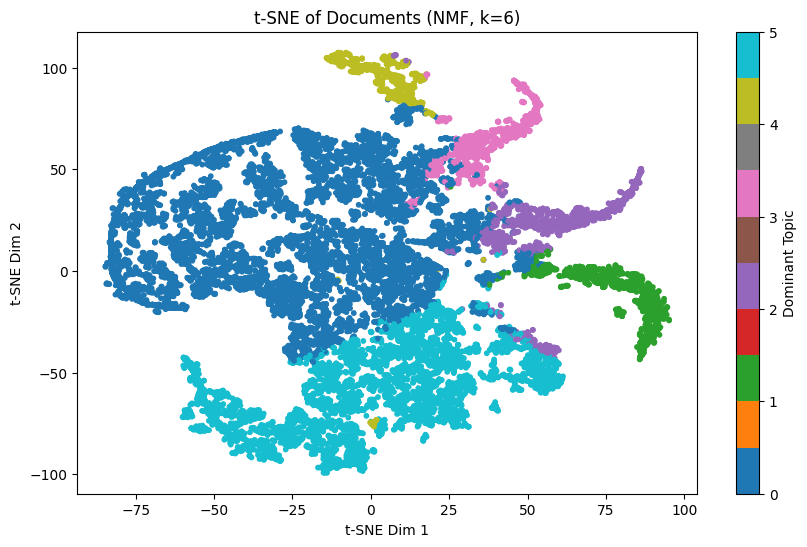

In [103]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

W = nmf_best.transform(X)
dominant = np.argmax(W, axis=1)

tsne = TSNE(n_components=2, random_state=42, perplexity=50)
pts = tsne.fit_transform(W)

plt.figure(figsize=(10,6))
plt.scatter(pts[:,0], pts[:,1],
            c=dominant, cmap='tab10', s=10)
plt.colorbar(label='Dominant Topic')
plt.title(f"t-SNE of Documents (NMF, k={best_nmf['k']})")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


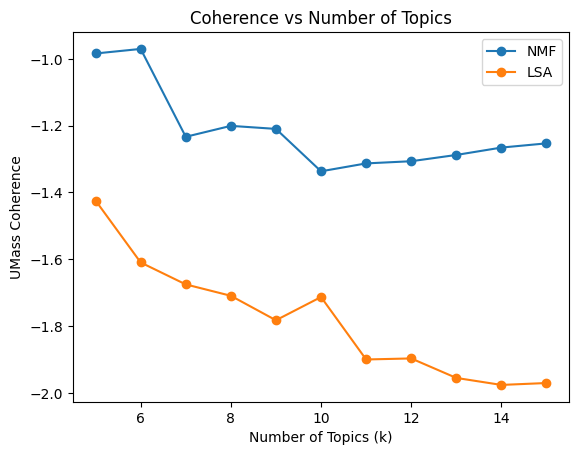

In [104]:
import numpy as np
from itertools import combinations
from sklearn.decomposition import NMF, TruncatedSVD
import matplotlib.pyplot as plt

# 1. Build binary term-document presence matrix
B = (X > 0).astype(int)
df = np.array(B.sum(axis=0)).flatten()

# 2. Co-occurrence & UMass coherence
def cooccurrence(i, j):
    return int(B[:, i].multiply(B[:, j]).sum())

def umass_coherence(topic_indices, eps=1):
    score = 0.0
    count = 0
    for wi, wj in combinations(topic_indices, 2):
        score += np.log((cooccurrence(wi, wj) + eps) / (df[wi] + eps))
        count += 1
    return score / count if count > 0 else 0.0

# 3. Sweep k and compute coherence
results = []
for k in range(5, 16):
    # NMF
    nmf = NMF(n_components=k, random_state=42).fit(X)
    H_nmf = nmf.components_
    topo_nmf = [topic.argsort()[-10:] for topic in H_nmf]
    coh_nmf = np.mean([umass_coherence(t) for t in topo_nmf])
    
    # LSA
    lsa = TruncatedSVD(n_components=k, random_state=42).fit(X)
    H_lsa = lsa.components_
    topo_lsa = [topic.argsort()[-10:] for topic in H_lsa]
    coh_lsa = np.mean([umass_coherence(t) for t in topo_lsa])
    
    results.append({'k': k, 'nmf_coherence': coh_nmf, 'lsa_coherence': coh_lsa})

# 4. Plot coherence vs k
ks = [r['k'] for r in results]
nmf_coh = [r['nmf_coherence'] for r in results]
lsa_coh = [r['lsa_coherence'] for r in results]

plt.figure()
plt.plot(ks, nmf_coh, marker='o')
plt.plot(ks, lsa_coh, marker='o')
plt.xlabel('Number of Topics (k)')
plt.ylabel('UMass Coherence')
plt.title('Coherence vs Number of Topics')
plt.legend(['NMF', 'LSA'])
plt.show()
